<a href="https://colab.research.google.com/github/zogojogo/Food-Detection-w-Machine-Learning/blob/main/Food_Detection_w_Food101_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Ambil data dari kaggle food101
2. Tambah Data foto makanan Indo
3. Pre-process
4. Image Annotation (buat faster R-CNN)
5. Buat modelnya
6. Train
7. Predict



#Setting & Prepare Dataset

In [1]:
!git clone https://github.com/zogojogo/Food-Detection-w-Machine-Learning.git

Cloning into 'Food-Detection-w-Machine-Learning'...
remote: Enumerating objects: 25404, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 25404 (delta 13), reused 31 (delta 11), pack-reused 25371
Receiving objects: 100% (25404/25404), 686.56 MiB | 47.11 MiB/s, done.
Resolving deltas: 100% (12677/12677), done.
Checking out files: 100% (38845/38845), done.


In [2]:
!mv '/content/Food-Detection-w-Machine-Learning/Data 20 Class/test/Sate' '/content/Food-Detection-w-Machine-Learning/Data 20 Class/test/sate'
!mv '/content/Food-Detection-w-Machine-Learning/Data 20 Class/test/Soto' '/content/Food-Detection-w-Machine-Learning/Data 20 Class/test/soto'
!mv '/content/Food-Detection-w-Machine-Learning/Data 20 Class/train/Sate' '/content/Food-Detection-w-Machine-Learning/Data 20 Class/train/sate'
!mv '/content/Food-Detection-w-Machine-Learning/Data 20 Class/train/Soto' '/content/Food-Detection-w-Machine-Learning/Data 20 Class/train/soto'

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow.compat.v2 as tf
import tensorflow_hub as hub
from datetime import datetime
import pathlib

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, TensorBoard, ModelCheckpoint
from tensorflow.keras.models import load_model

In [4]:
class_names_20 = ['ayam_geprek', 'bakso', 'chicken_wings', 'donuts', 'french_fries',  'fried_rice', 'hamburger', 'ice_cream', 'lasagna', 'macaroni_and_cheese',
                  'onion_rings', 'pancakes', 'pizza', 'sashimi', 'sate', 'soto',  'spaghetti_bolognese', 'spring_rolls', 'steak', 'waffles']
print(len(class_names_20))

20


In [ ]:
# labels_index = {'ayam_geprek' : 0, 'bakso' : 1, 'cheesecake' : 2, 'chicken_curry' : 3, 'chicken_wings' : 4, 'chocolate_cake' : 5,
#                 'churros' : 6, 'cup_cakes' : 7, 'donuts' : 8, 'dumplings' : 9, 'fish_and_chips' : 10,
#                 'french_fries' : 11, 'french_toast' : 12, 'fried_rice' : 13, 'frozen_yogurt' : 14, 'garlic_bread' : 15, 'greek_salad' : 16,
#                 'grilled_cheese_sandwich' : 17, 'grilled_salmon' : 18, 'gyoza' : 19, 'hamburger' : 20, 'hot_dog' : 21, 'ice_cream' : 22, 'lasagna' : 23,
#                 'macaroni_and_cheese' : 24, 'nachos' : 25, 'omelette' : 26, 'onion_rings' : 27, 'pancakes' : 28, 'peking_duck' : 29, 'pho' : 30, 'pizza' : 31,
#                 'pork_chop' : 32, 'prime_rib' : 33, 'ramen' : 34, 'red_velvet_cake' : 35, 'rendang' : 36, 'risotto' : 37, 'sashimi' : 38, 'sate' : 39, 'soto' : 40,
#                 'spaghetti_bolognese' : 41, 'spaghetti_carbonara' : 42, 'spring_rolls' : 43, 'steak' : 44, 'sushi' : 45, 'tacos' : 46, 'takoyaki' : 47, 'tiramisu' : 48
#                 , 'waffles' : 49}

In [ ]:
# class_names = ['ayam_geprek', 'bakso', 'cheesecake', 'chicken_curry', 'chicken_wings', 'chocolate_cake',
#                 'churros', 'cup_cakes', 'donuts', 'dumplings', 'fish_and_chips',
#                 'french_fries', 'french_toast', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'greek_salad',
#                 'grilled_cheese_sandwich', 'grilled_salmon', 'gyoza', 'hamburger', 'hot_dog', 'ice_cream', 'lasagna',
#                 'macaroni_and_cheese', 'nachos', 'omelette', 'onion_rings', 'pancakes', 'peking_duck', 'pho', 'pizza',
#                 'pork_chop', 'prime_rib', 'ramen', 'red_velvet_cake', 'rendang', 'risotto', 'sashimi', 'sate', 'soto',
#                 'spaghetti_bolognese', 'spaghetti_carbonara', 'spring_rolls', 'steak', 'sushi', 'tacos', 'takoyaki', 'tiramisu'
#                 , 'waffles']

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.3,
        horizontal_flip=True,
        zoom_range=0.25,
)
valid_datagen = ImageDataGenerator(
        rescale=1./255,
)

In [ ]:
batch_size = 32

train_data = train_datagen.flow_from_directory(
    '/content/Food-Detection-w-Machine-Learning/Data 20 Class/train',
    batch_size=batch_size,
    target_size=(299, 299),
    shuffle=True,
    # class_mode = 'categorical'
)
valid_data = valid_datagen.flow_from_directory(
    '/content/Food-Detection-w-Machine-Learning/Data 20 Class/test',
    target_size=(299, 299),
    batch_size=batch_size,
    shuffle=False,
    # class_mode = 'categorical'
)


Found 4000 images belonging to 20 classes.
Found 1000 images belonging to 20 classes.


# Create Model Architecture

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5"
# feature_extractor_model = "https://tfhub.dev/google/imagenet/resnet_v2_101/feature_vector/5"

In [ ]:
feature_extractor_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [ ]:
base = InceptionV3(input_shape=(299,299,3),include_top=False,weights='imagenet')
model = Sequential()
model.add(base)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20, kernel_regularizer=tf.keras.regularizers.l2(0.005), activation='softmax'))
opt = SGD(learning_rate=0.0001, momentum=0.9)
# opt = Adam(learning_rate=0.002)
model.compile(optimizer=opt,loss = 'categorical_crossentropy',metrics=['accuracy'])

87916544/87910968 [==============================] - 2s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 8, 8, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                2580      
Total params: 22,067,636
Trainable params: 22,033,204
Non-trainable params: 34,432
_________________________________________________________________


In [ ]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',patience = 1,verbose = 1)
early_stop = EarlyStopping(monitor = 'val_accuracy',patience = 5,verbose = 1,restore_best_weights = True)
checkpointer = ModelCheckpoint(filepath='best_model_20class.hdf5', verbose=1, save_best_only=True)

# Train Model

In [ ]:
history = model.fit(train_data, 
                    epochs=25,
                    validation_data = valid_data, 
                    verbose = 1,
                    callbacks=[checkpointer])

Epoch 1/25
125/125 [==============================] - 139s 783ms/step - loss: 3.1660 - accuracy: 0.0642 - val_loss: 3.0343 - val_accuracy: 0.1290

Epoch 00001: val_loss improved from inf to 3.03429, saving model to best_model_20class.hdf5
Epoch 2/25
125/125 [==============================] - 96s 765ms/step - loss: 2.9921 - accuracy: 0.1580 - val_loss: 2.8623 - val_accuracy: 0.2670

Epoch 00002: val_loss improved from 3.03429 to 2.86228, saving model to best_model_20class.hdf5
Epoch 3/25
125/125 [==============================] - 96s 763ms/step - loss: 2.8097 - accuracy: 0.2780 - val_loss: 2.6671 - val_accuracy: 0.4220

Epoch 00003: val_loss improved from 2.86228 to 2.66708, saving model to best_model_20class.hdf5
Epoch 4/25
125/125 [==============================] - 96s 763ms/step - loss: 2.5838 - accuracy: 0.3950 - val_loss: 2.4114 - val_accuracy: 0.5310

Epoch 00004: val_loss improved from 2.66708 to 2.41139, saving model to best_model_20class.hdf5
Epoch 5/25
125/125 [===============

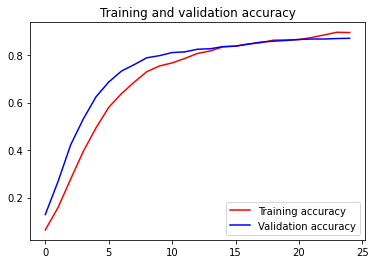

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

# Inference

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
tf.keras.backend.clear_session()
model_best = load_model('/content/drive/MyDrive/Saved_Model/best_model_20class (1).hdf5',compile = False)

In [7]:
def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255.                                      

    pred = model.predict(img)
    print(pred)
    index = np.argmax(pred)
    class_names_20.sort()
    pred_value = class_names_20[index]
    if show:
        plt.imshow(img[0])                           
        plt.axis('off')
        plt.title(pred_value)
        plt.show()

## Inference with wget

In [ ]:
!wget -O mcflurry.jpg https://assets-pergikuliner.com/uploads/image/picture/838666/picture-1519643447.jpeg
!wget -O nasgor.jpg https://awsimages.detik.net.id/community/media/visual/2020/08/18/nasi-goreng-pedas_43.jpeg?w=700&q=90
!wget -O pizza.jpg https://blue.kumparan.com/image/upload/fl_progressive,fl_lossy,c_fill,q_auto:best,w_640/v1607811529/jdrkme39ayxjkamtrjma.jpg
!wget -O bigmac.jpg https://ichef.bbci.co.uk/news/640/cpsprodpb/55BF/production/_103915912_gettyimages-1011819170.jpg
!wget -O geprek.jpg https://awsimages.detik.net.id/community/media/visual/2020/06/12/geprek-bensu-dan-i-am-geprek-bensu-1_169.jpeg?w=700&q=90

--2021-05-27 03:34:00--  https://assets-pergikuliner.com/uploads/image/picture/838666/picture-1519643447.jpeg
Resolving assets-pergikuliner.com (assets-pergikuliner.com)... 99.84.219.128, 99.84.219.9, 99.84.219.41, ...
Connecting to assets-pergikuliner.com (assets-pergikuliner.com)|99.84.219.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 115388 (113K) [image/jpeg]
Saving to: ‘mcflurry.jpg’

mcflurry.jpg        100%[===================>] 112.68K  --.-KB/s    in 0.01s   

2021-05-27 03:34:00 (8.22 MB/s) - ‘mcflurry.jpg’ saved [115388/115388]

--2021-05-27 03:34:00--  https://awsimages.detik.net.id/community/media/visual/2020/08/18/nasi-goreng-pedas_43.jpeg?w=700
Resolving awsimages.detik.net.id (awsimages.detik.net.id)... 103.49.221.102, 203.190.242.102
Connecting to awsimages.detik.net.id (awsimages.detik.net.id)|103.49.221.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66617 (65K) [image/jpeg]
Saving to: ‘nasgor.jpg’

nasgor

[[8.1896648e-04 1.0987854e-04 3.3923271e-04 1.8965278e-03 1.2662734e-03
  2.8381715e-04 9.7623777e-01 1.6878429e-03 1.5255351e-03 2.8361450e-04
  1.0564115e-03 7.8109964e-03 6.1218825e-04 1.2066796e-03 2.5530503e-04
  1.7695260e-04 1.3770558e-03 8.7872241e-04 8.9884939e-04 1.2773441e-03]]


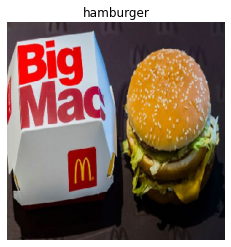

[[2.7646069e-04 2.3241702e-03 6.5156393e-04 1.6810466e-03 4.0031932e-03
  1.6284043e-03 1.0235511e-03 9.7688097e-01 3.7617082e-04 1.0771926e-04
  1.1824437e-03 3.1084081e-03 1.1932553e-03 4.2944308e-04 1.2763628e-03
  6.2440918e-04 1.1049751e-03 1.1413470e-03 3.2796623e-04 6.5824331e-04]]


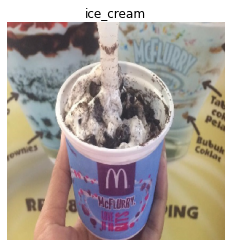

[[0.2224882  0.00125693 0.00524263 0.01226568 0.00708651 0.53700536
  0.02165909 0.01113507 0.02029956 0.01927796 0.00245681 0.00281038
  0.008794   0.00259156 0.00824062 0.0109123  0.0583942  0.03178132
  0.01041802 0.00588378]]


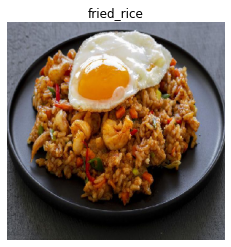

[[6.4996851e-04 9.9764066e-04 5.5720692e-04 1.6539949e-03 9.2263595e-04
  3.0834738e-03 4.6310478e-04 3.1306935e-03 3.2051099e-03 1.1132214e-03
  2.0501114e-04 3.9990754e-03 9.6222520e-01 6.1349507e-04 3.5674693e-03
  2.3475746e-03 3.8267756e-03 9.1041980e-04 2.2015669e-03 4.3264218e-03]]


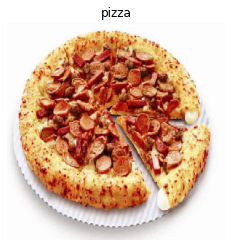

[[8.4043771e-01 1.1469866e-03 9.7027951e-04 8.5689023e-02 2.3043943e-03
  1.4261384e-02 3.8389999e-03 7.2887628e-03 6.0257548e-03 5.3508324e-04
  3.8401477e-04 2.1768194e-03 7.5591723e-03 1.6943980e-03 2.3175979e-03
  3.7579706e-03 2.9170832e-03 1.4018333e-02 2.1919550e-03 4.8431879e-04]]


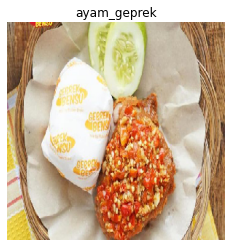

In [ ]:
predict_class(model_best, ['bigmac.jpg', 'mcflurry.jpg', 'nasgor.jpg', 'pizza.jpg', 'geprek.jpg'], True)

## Inference with colab files upload

Saving 28869.jpg to 28869.jpg
Saving 38345.jpg to 38345.jpg
Saving 45047.jpg to 45047.jpg
Saving 50766.jpg to 50766.jpg
Saving 57508.jpg to 57508.jpg
[[3.5768072e-04 9.2679408e-04 1.0231700e-03 1.2075530e-03 1.4964634e-02
  1.9109051e-04 1.1348303e-03 7.7202579e-04 1.2022356e-04 1.5857099e-03
  9.7360295e-01 1.9209160e-04 1.8199412e-04 2.7181150e-04 5.7897490e-04
  8.5984298e-04 8.4512570e-04 2.0285821e-04 3.7931406e-04 6.0131279e-04]]


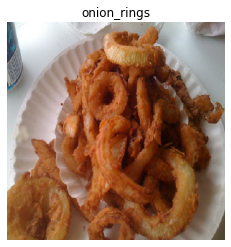

[[6.9240527e-04 7.8820612e-04 2.6959155e-03 2.3705217e-03 9.3619423e-03
  1.8774871e-04 1.0772236e-03 1.3557220e-03 1.7674301e-04 1.0143135e-03
  9.7290796e-01 2.4459598e-04 1.6581964e-04 8.7972730e-04 1.0833272e-03
  4.5905926e-04 2.1509952e-03 3.7838673e-04 8.9913560e-04 1.1101068e-03]]


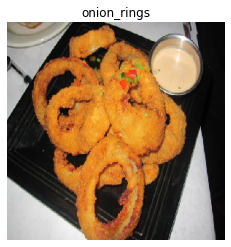

[[1.4650112e-03 1.6331672e-03 3.6212772e-03 1.9219143e-02 7.4217631e-03
  4.5174154e-04 4.2161914e-03 1.6560018e-03 6.0384208e-04 5.5523659e-03
  9.4380856e-01 1.4445764e-03 4.4883174e-04 3.3133809e-04 1.0596744e-03
  1.7052995e-03 6.7168736e-04 1.2055417e-03 1.7991740e-03 1.6847900e-03]]


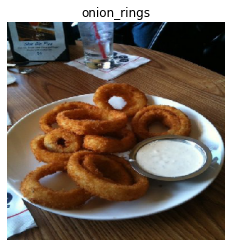

[[8.9399255e-04 1.0846271e-03 1.3598864e-03 9.2039565e-03 2.9304209e-03
  3.9501642e-04 2.5487924e-03 9.5008267e-04 4.4220677e-04 3.9163041e-03
  9.6976018e-01 4.9527240e-04 3.7419310e-04 3.6580025e-04 7.7216647e-04
  8.6417294e-04 8.8038936e-04 8.5394375e-04 1.2996187e-03 6.0893956e-04]]


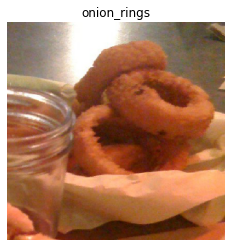

[[2.0302770e-04 4.6259203e-04 5.0330674e-04 2.4706030e-03 1.3130631e-03
  8.9387540e-05 1.2111661e-03 3.7630508e-04 7.6706696e-05 1.6021902e-03
  9.8911488e-01 3.0327964e-04 7.0604154e-05 2.5717562e-04 1.9093344e-04
  3.3329293e-04 5.3514936e-04 9.6434982e-05 2.6691993e-04 5.2288250e-04]]


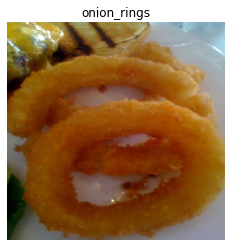

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
images = []
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  images.append(path)

predict_class(model_best, images, True)

# Export to Tensorflow Lite

In [8]:
export_dir = '/tmp/my_saved_model'
tf.saved_model.save(model_best, export_dir)


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: /tmp/my_saved_model/assets


In [9]:
print(tf.__version__)

2.5.0


In [ ]:
mode = "Speed" 

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# Set the optimzations
converter.optimizations = [optimization]

# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert()

In [ ]:
tflite_model_file = pathlib.Path('/content/Food-Detection-w-Machine-Learning/model.tflite')
tflite_model_file.write_bytes(tflite_model)

22505184

In [ ]:
!git push

fatal: could not read Username for 'https://github.com': No such device or address


# Export to Tensorflow JS (Optional)

In [ ]:
!pip install tensorflowjs
!tensorflowjs_converter --input_format=keras {saved_model_path} ./